## ANÁLISIS BIVARIANTE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("..")
from utils.viztools import *

# Para realizar los tests estadísticos vamos a importar de la librería scipy:
from scipy import stats
from scipy.stats import *

In [2]:
df = pd.read_csv("../data/Metabolic_Syndrome_final_version.csv", index_col=[0])

### PREGUNTAS




**1. ¿Hay alguna relación entre los ingresos mensuales y el diagnóstico de síndrome metabólico?**

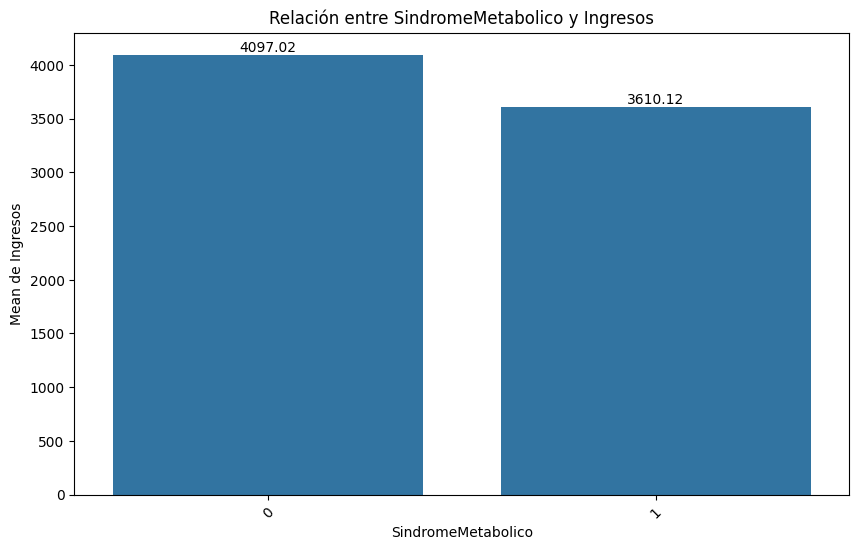

In [3]:
relacion_categorica_numerica(df, "SindromeMetabolico", "Ingresos", show_values = True, measure = "mean")

c:\Users\mpuch\Desktop\DS_ONLINE\000_Project_Break_I__EDA\EDA\src\notebooks\..\utils\viztools.py:218: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(subset_df[subset_df[cat_col] == cat][num_col], kde=True, label=str(cat), palette = "viridis")
c:\Users\mpuch\Desktop\DS_ONLINE\000_Project_Break_I__EDA\EDA\src\notebooks\..\utils\viztools.py:218: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(subset_df[subset_df[cat_col] == cat][num_col], kde=True, label=str(cat), palette = "viridis")


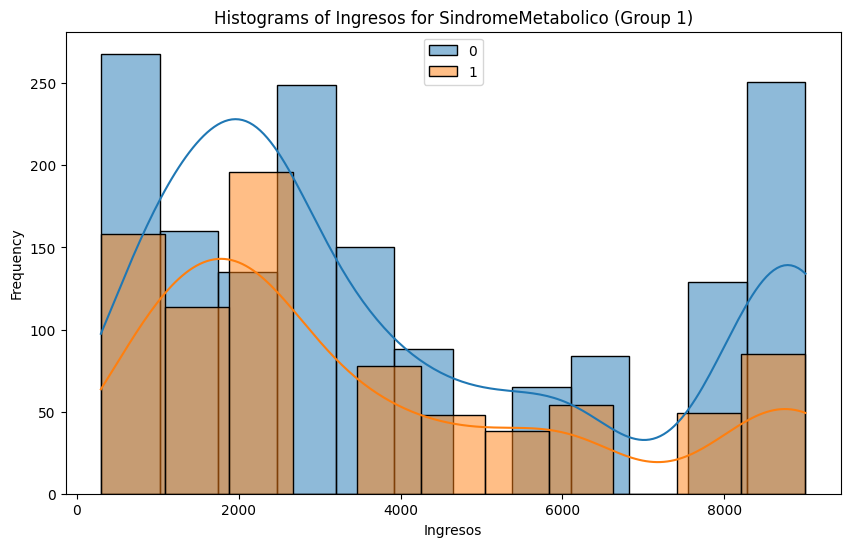

In [4]:
histogramas_agrupados(df, cat_col = "SindromeMetabolico", num_col = "Ingresos", group_size= 2)

Parece que los sujetos diagnosticados con síndrome metabólico tienen una media de ingresos inferior a los que no están diagnosticados. Vamos a pasarle un estadístico para comprobar si realmente hay relación entre estas dos variables:

In [5]:
# Dividimos nuestro dataset en 2 grupos: los que no tienen el diagnóstico y los que sí:
grupo_sano = df.loc[df.SindromeMetabolico == 0]["Ingresos"]
grupo_sm = df.loc[df.SindromeMetabolico == 1]["Ingresos"]

# Obtenemos los valores del estadístico U Mann-Whitney y los mostramos:
u_stat, p_valor = mannwhitneyu(grupo_sano, grupo_sm)
print("U-Statistic:", u_stat)
print("P-Value:", p_valor)

U-Statistic: 705411.0
P-Value: 0.0002898928834066906


Como P-Value < 0.05, rechazamos la hipótesis nula y podemos decir que sí hay relación entre estas dos variables: **los ingresos pueden influir en el diagnóstico de síndrome metabólico.**

**2. ¿Es influyente el estado civil de la persona?**

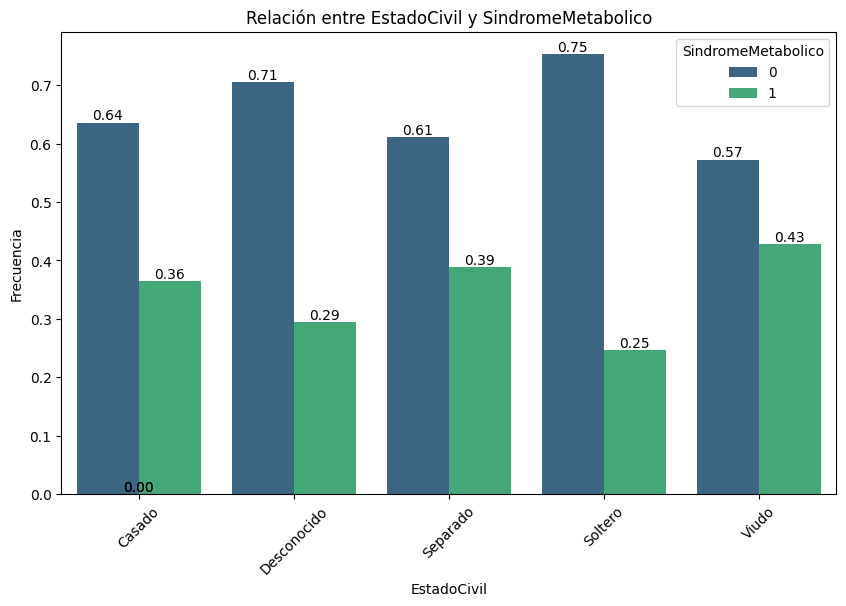

In [6]:
relacion_categoricas(df, "EstadoCivil", "SindromeMetabolico", relative_freq = True, show_values = True)

Podríamos destacar que los viudos y separados parecen tener un mayor porcentaje de diagnóstico de síndrome metabólico, mientras que los solteros solo tienen un 25%. Vamos a utilizar el estadístico Chi-cuadrado para ver si hay relación entre la variable de estado civil y el síndrome:

In [7]:
# Creamos una tabla de contingencia:
tabla_contingencia = pd.crosstab(df["SindromeMetabolico"], df["EstadoCivil"])

# Obtenemos los valores de interés y los mostramos:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 33.388881540076
P-Value: 9.943363964008175e-07
Grados de Libertad: 4
Tabla de Frecuencias Esperadas:
 [[783.90537724 136.24551897 221.81033764 327.77907461 109.25969154]
 [407.09462276  70.75448103 115.18966236 170.22092539  56.74030846]]


Como P-Value < 0.05, podemos afirmar que **el estado civil del sujeto influye en el diagnóstico de síndrome metabólico.**

**3. ¿Qué importancia tiene la etnia?**


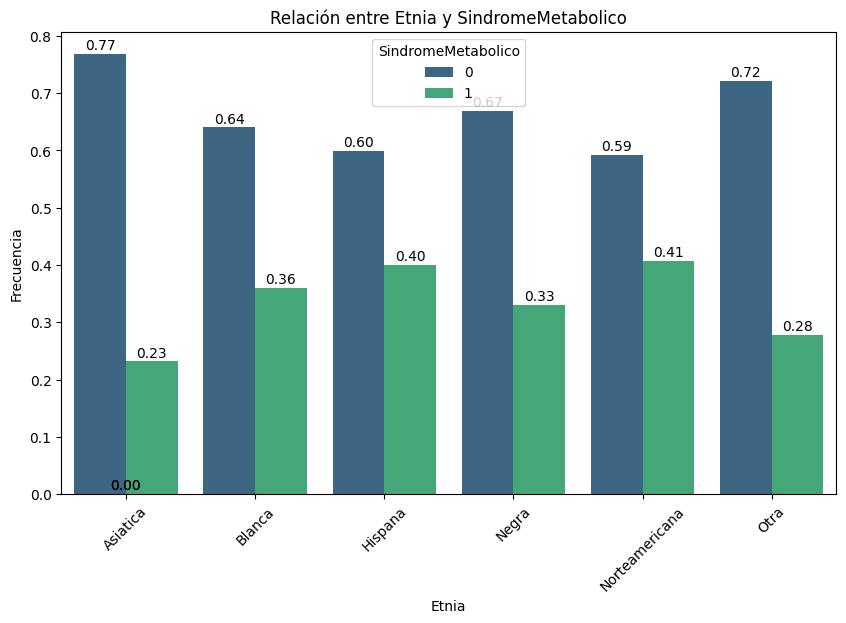

In [11]:
relacion_categoricas(df, "Etnia", "SindromeMetabolico", relative_freq = True, show_values = True, size_group = 6)

Podemos destacar un mayor porcentaje de sujetos con síndrome metabólico en los grupos de etnia hispana y norteamericana (40%). Sin embargo, los asiáticos tienen un porcentaje muy bajo (23%). Vamos a pasar el estadístico Chi-cuadrado para ver si hay relación estadísticamente significativa:

In [12]:
# Creamos una tabla de contingencia:
tabla_contingencia = pd.crosstab(df["SindromeMetabolico"], df["Etnia"])

# Obtenemos los valores de interés y los mostramos:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 30.189565151490104
P-Value: 1.353402988562851e-05
Grados de Libertad: 5
Tabla de Frecuencias Esperadas:
 [[229.7086286  612.77573989 169.15506461 360.68862026 166.52230096
   40.14964569]
 [119.2913714  318.22426011  87.84493539 187.31137974  86.47769904
   20.85035431]]


Como P-Value < 0.05, podríamos decir que **la etnia del sujeto está relacionada con el diagnóstico de síndrome metabólico.**

**4. ¿Cómo influye la edad en el diagnóstico?**

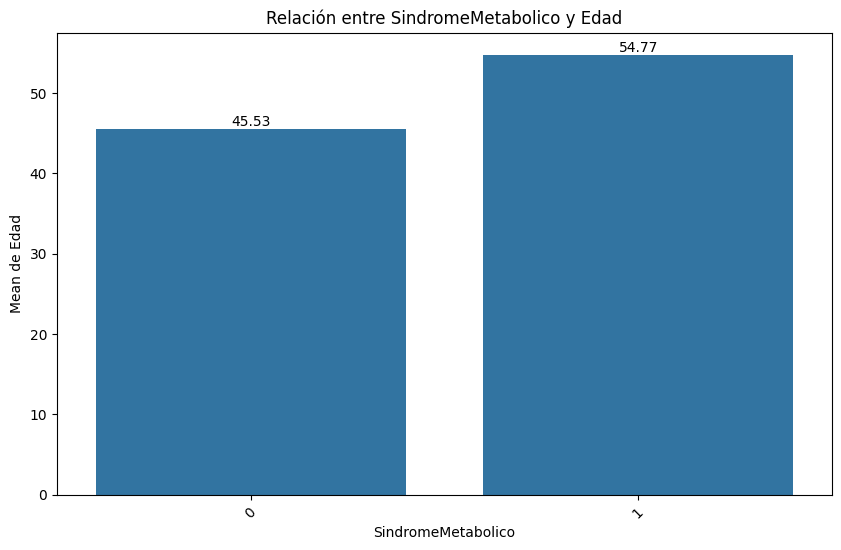

In [9]:
relacion_categorica_numerica(df, "SindromeMetabolico", "Edad", show_values = True, measure = "mean")

c:\Users\mpuch\Desktop\DS_ONLINE\000_Project_Break_I__EDA\EDA\src\notebooks\..\utils\viztools.py:218: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(subset_df[subset_df[cat_col] == cat][num_col], kde=True, label=str(cat), palette = "viridis")
c:\Users\mpuch\Desktop\DS_ONLINE\000_Project_Break_I__EDA\EDA\src\notebooks\..\utils\viztools.py:218: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(subset_df[subset_df[cat_col] == cat][num_col], kde=True, label=str(cat), palette = "viridis")


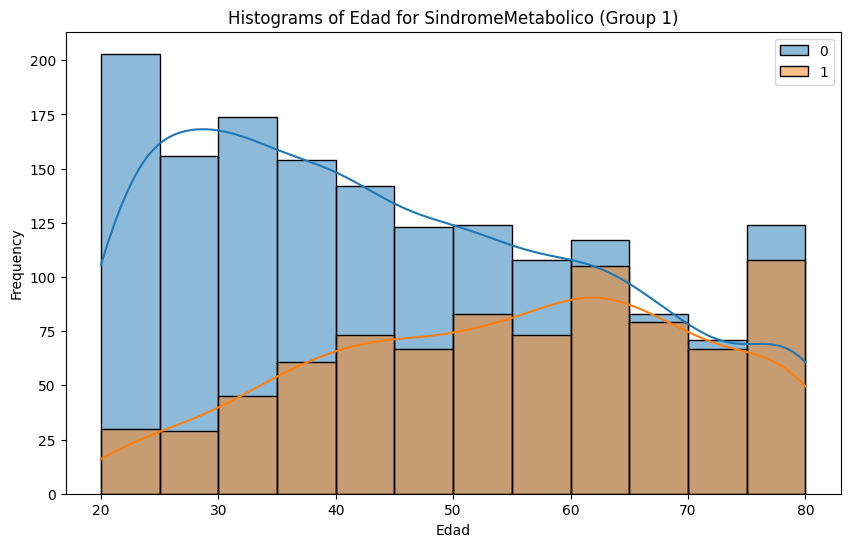

In [11]:
histogramas_agrupados(df, cat_col = "SindromeMetabolico", num_col = "Edad", group_size= 2)

In [10]:
# Dividimos nuestro dataset en 2 grupos: los que no tienen el diagnóstico y los que sí:
grupo_sano = df.loc[df.SindromeMetabolico == 0]["Edad"]
grupo_sm = df.loc[df.SindromeMetabolico == 1]["Edad"]

# Obtenemos los valores del estadístico U Mann-Whitney y los mostramos:
u_stat, p_valor = mannwhitneyu(grupo_sano, grupo_sm)
print("U-Statistic:", u_stat)
print("P-Value:", p_valor)

U-Statistic: 448175.5
P-Value: 3.26342743422504e-35


Observamos una clara relación entre edad y síndrome metabólico: a mayor edad, mayor número de casos.

**5. ¿Hay alguna relación entre el IMC y la circunferencia de la cintura con las etnias?**

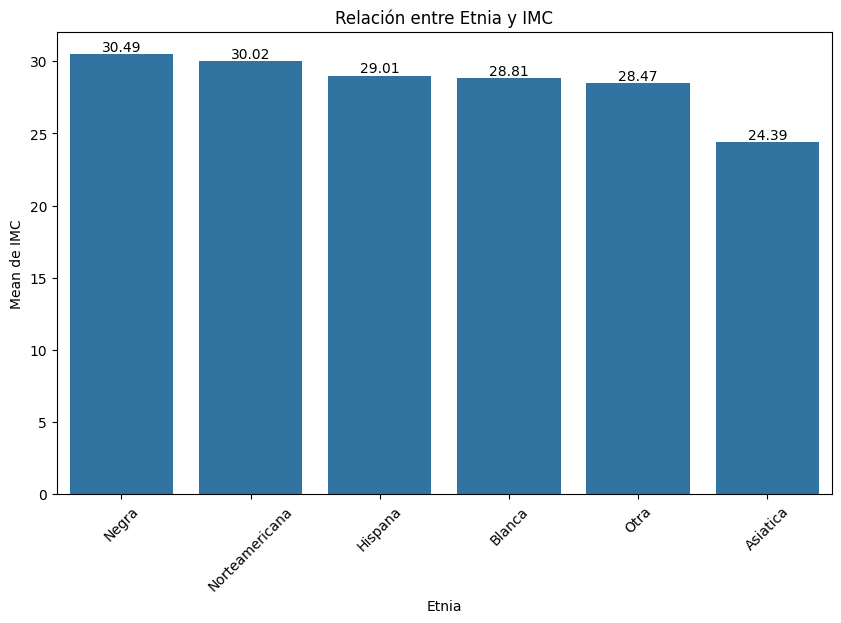

In [13]:
relacion_categorica_numerica(df, "Etnia", "IMC", show_values = True, measure = "mean")

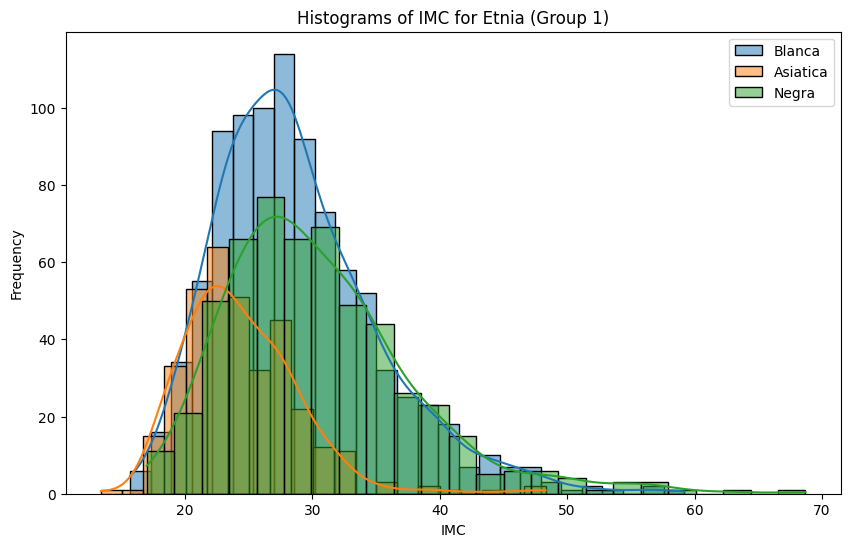

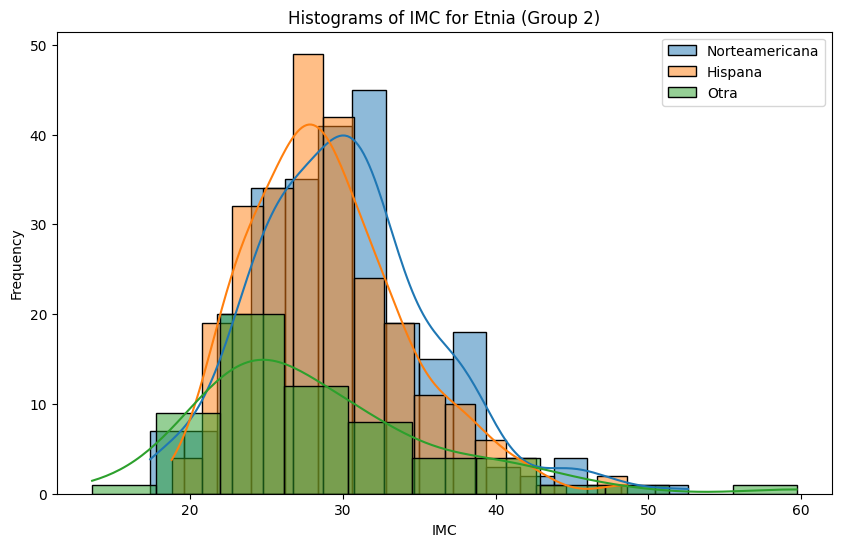

In [14]:
histogramas_agrupados(df, cat_col = "Etnia", num_col = "IMC", group_size= 3)

En cuanto al IMC, sí que vemos una clara diferencia entre todas las etnias y la asiática, puesto que la media de este grupo es tan solo de 24.4, mientras que el restro está alrededor de 30.
Un dato que nos puede llamar la atención, es que la etnia negra tiene la mayor media en IMC; sin embargo, tiene un menor porcentaje de positivos en síndrome metabólico si lo comparamos con la etnia hispana y norteamericana. 

Para ver si tiene relevancia estadística, vamos a realizar el test de ANOVA:

In [15]:
# Obtenemos el IMC en una lista agrupándolo por etnias:
grupos = df["Etnia"].unique()  
IMC_etnia = [df[df["Etnia"] == grupo]["IMC"] for grupo in grupos]

f_val, p_val = stats.f_oneway(*IMC_etnia)
print("F-Value:", f_val)
print("P-Value:", p_val)

F-Value: 43.114138614300465
P-Value: 1.1348371544454363e-42


C:\Users\mpuch\AppData\Local\Temp\ipykernel_16192\349420759.py:5: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  f_val, p_val = stats.f_oneway(*IMC_etnia)


Como podríamos esperar, el P-Value es menor que 0.05, por lo que sí hay relación entre la etnia y el IMC.

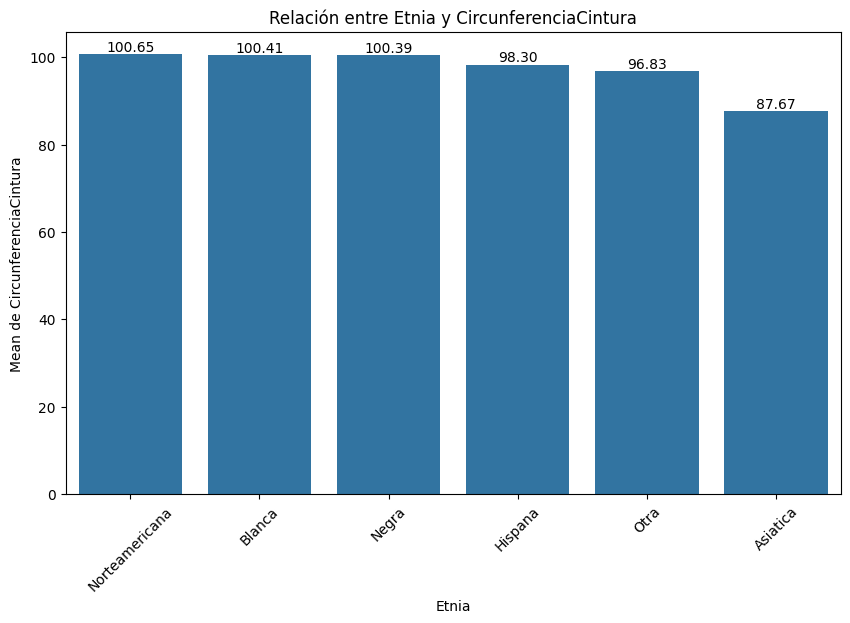

In [16]:
relacion_categorica_numerica(df, "Etnia", "CircunferenciaCintura", show_values = True, measure = "mean")

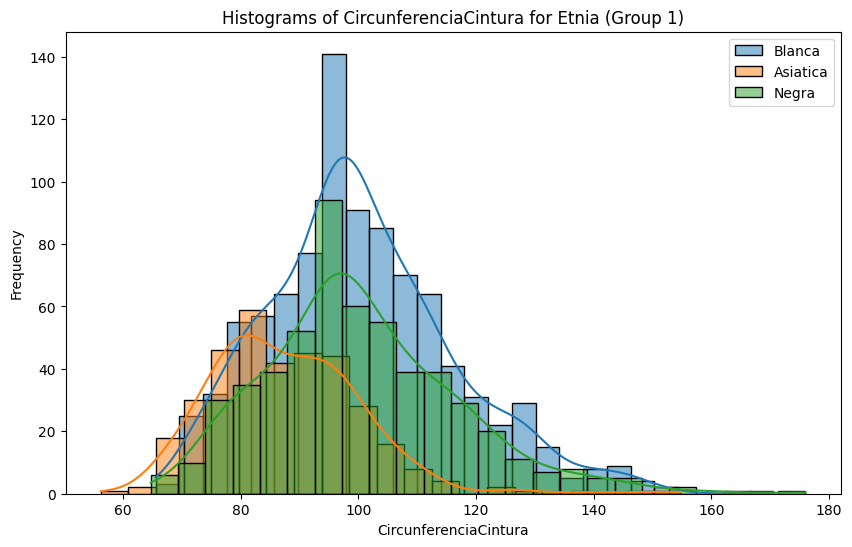

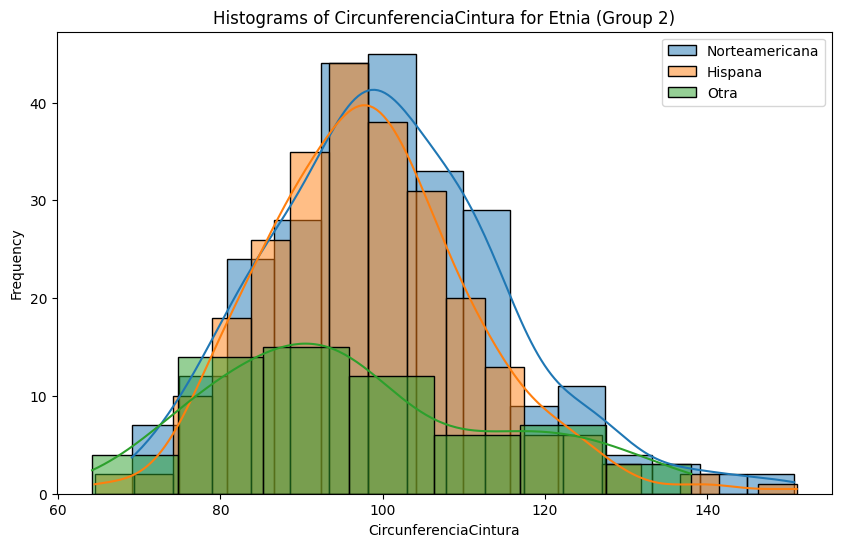

In [17]:
histogramas_agrupados(df, cat_col = "Etnia", num_col = "CircunferenciaCintura", group_size= 3)

Si hablamos de circunferencia de la cintura, hay 3 etnias que no tienen prácticamente diferencia: la negra, la blanca y la norteamericana (alrededor de 100 cm). De esta manera, nos vuelve a llamar la atención cómo la norteamericana tiene un mayor porcentaje de positivos en síndrome metabólico.

Volvemos a utilizar el estadístico ANOVA:

In [18]:
# Obtenemos la circunferencia de la cintura en una lista agrupándolo por etnias:
grupos = df["Etnia"].unique()  
IMC_etnia = [df[df["Etnia"] == grupo]["CircunferenciaCintura"] for grupo in grupos]

f_val, p_val = stats.f_oneway(*IMC_etnia)
print("F-Value:", f_val)
print("P-Value:", p_val)

F-Value: 40.311740283012654
P-Value: 6.513621972633501e-40


C:\Users\mpuch\AppData\Local\Temp\ipykernel_16192\4200551935.py:5: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  f_val, p_val = stats.f_oneway(*IMC_etnia)


Y efectivamente observamos que hay relación entre las variables.

Es decir, tanto el IMC como la circunferencia de la cintura tienen relación con la etnia del sujeto de estudio. Además, observamos dos cosas interesantes:
- La etnia negra tiene de media un IMC muy alto, sin embargo no es el grupo que mayor porcentaje de síndrome metabólico tiene.
- La etnia norteamericana tiene una media de circunferencia de la cintura muy parecida a la que tienen otras etnias, pero es una de las que más sujetos con síndrome metabólico tiene.

**6. ¿Y los valores de los indicadores sanguíneos con las etnias?**

Tendremos que ver cómo se comporta la albuminuria, ácido úrico, glucosa en sangre, HDL y triglicéridos en cada etnia.


**Albuminuria:**

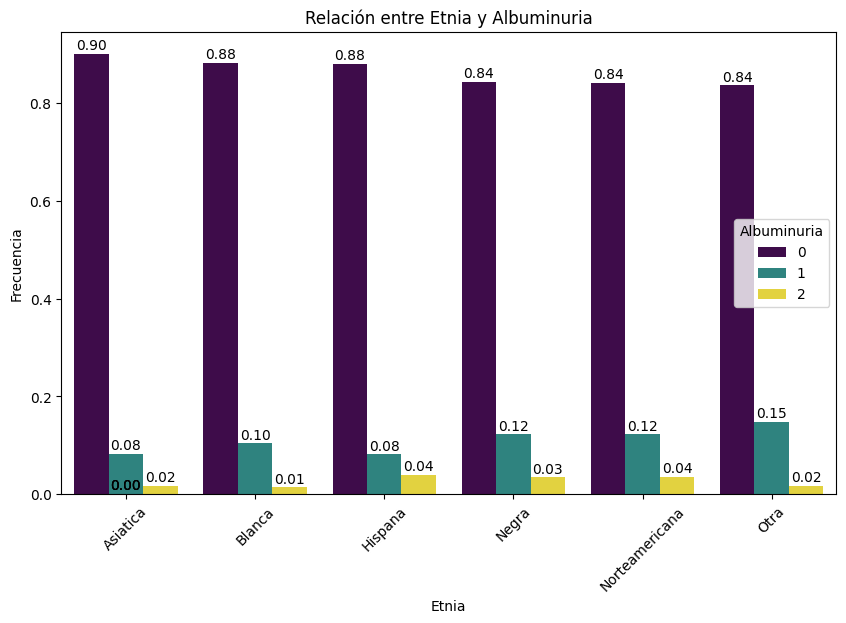

In [19]:
relacion_categoricas(df, "Etnia", "Albuminuria", relative_freq = True, show_values = True, size_group = 6)

No parece que haya demasiada relación entre la etnia y la variable de albuminuria, aun así, para asegurarnos, pasamos el estadístico:

In [20]:
# Creamos una tabla de contingencia:
tabla_contingencia = pd.crosstab(df["Albuminuria"], df["Etnia"])

# Obtenemos los valores de interés y los mostramos:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 18.540720188517916
P-Value: 0.04649924671843136
Grados de Libertad: 10
Tabla de Frecuencias Esperadas:
 [[303.61108795 809.91954981 223.57607336 476.73030429 220.09629012
   53.06669446]
 [ 36.95122968  98.57190496  27.21050438  58.02084202  26.78699458
    6.45852439]
 [  8.43768237  22.50854523   6.21342226  13.24885369   6.1167153
    1.47478116]]


Tras realizar el análisis, observamos que P-Value es menor que 0.05, por poco, así que sí podemos decir que hay relación, aunque no creo que sea muy interesante. 

**Ácido úrico:**

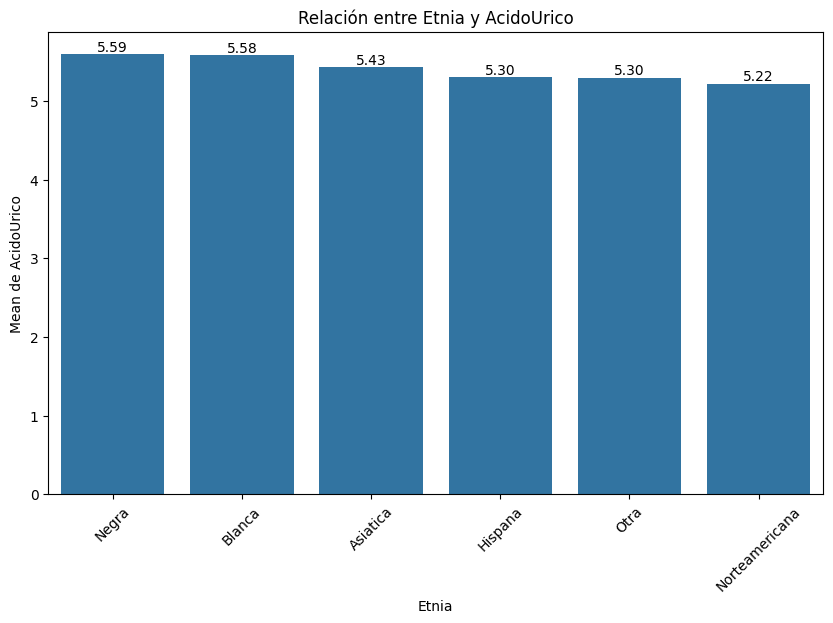

In [14]:
relacion_categorica_numerica(df, "Etnia", "AcidoUrico", show_values = True, measure = "mean")

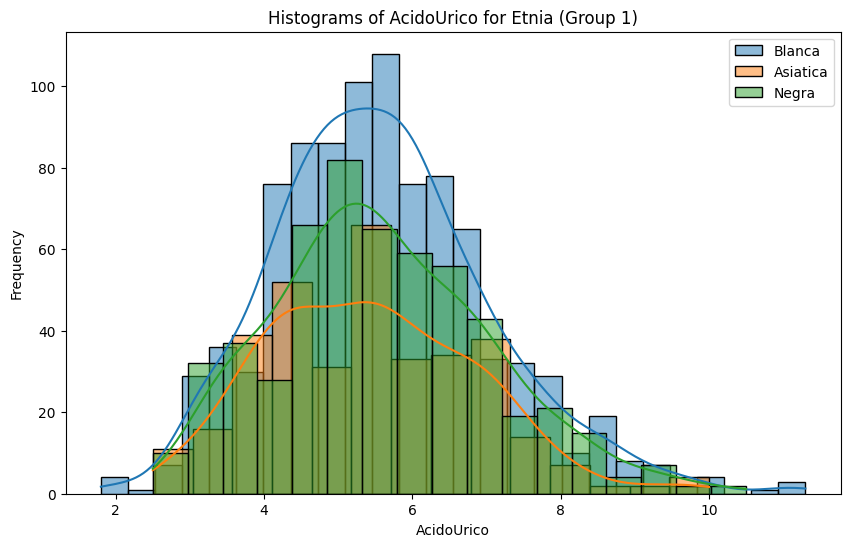

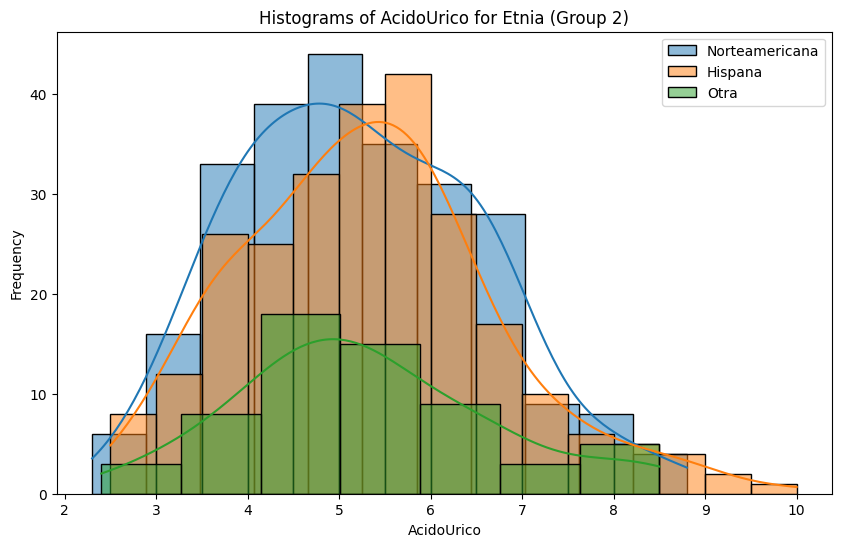

In [15]:
histogramas_agrupados(df, cat_col = "Etnia", num_col = "AcidoUrico", group_size= 3)

Con los valores de ácido úrico pasa lo mismo, no parece que haya mucha diferencia en ellos de una etnia a otra.

In [21]:
# Obtenemos el valor de ácido úrico en una lista agrupándolo por etnias:
grupos = df["Etnia"].unique()  
au_etnia = [df[df["Etnia"] == grupo]["AcidoUrico"] for grupo in grupos]

f_val, p_val = stats.f_oneway(*au_etnia)
print("F-Value:", f_val)
print("P-Value:", p_val)

F-Value: 4.407008803874997
P-Value: 0.0005356630919000294


C:\Users\mpuch\AppData\Local\Temp\ipykernel_16192\797934367.py:5: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  f_val, p_val = stats.f_oneway(*au_etnia)


**Glucosa en sangre:**

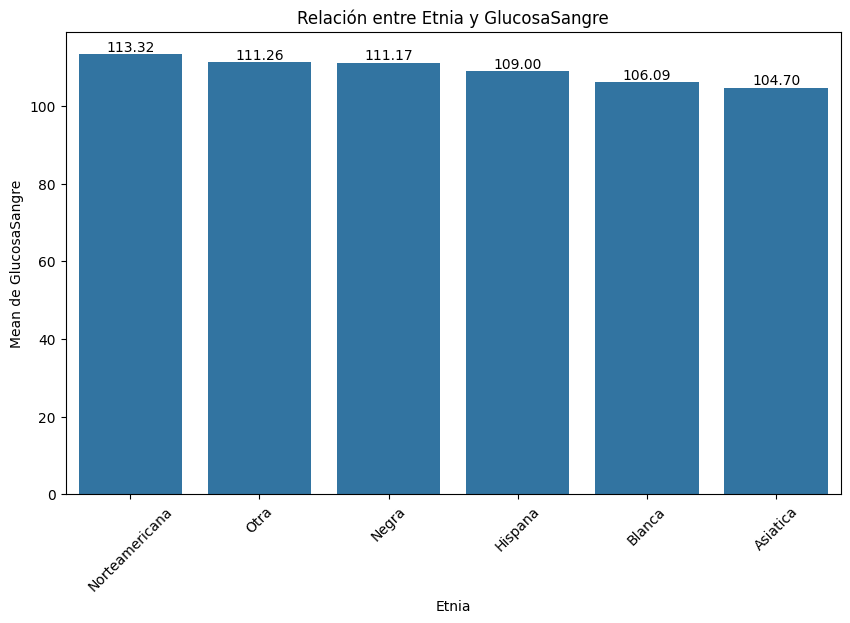

In [22]:
relacion_categorica_numerica(df, "Etnia", "GlucosaSangre", show_values = True, measure = "mean")

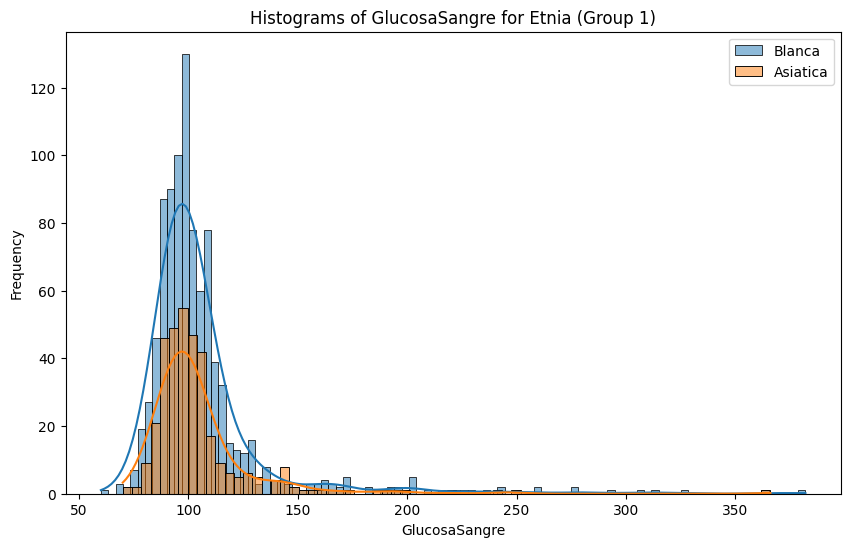

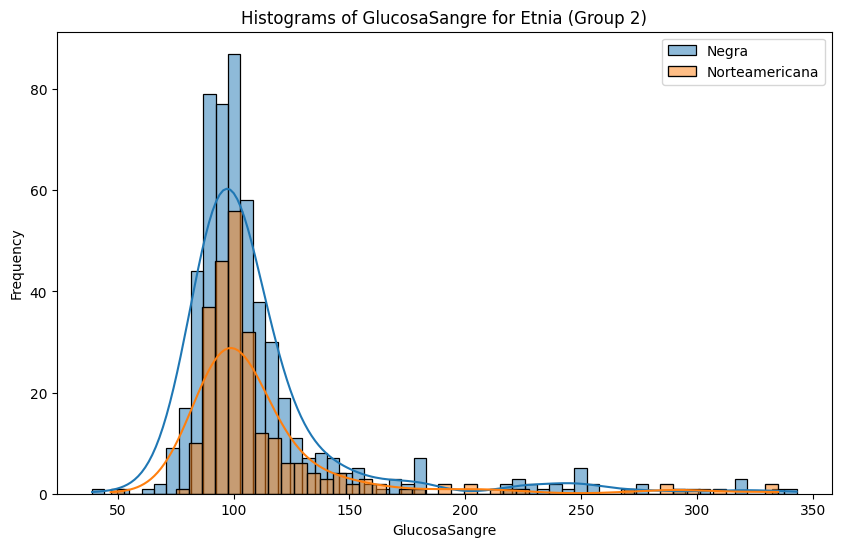

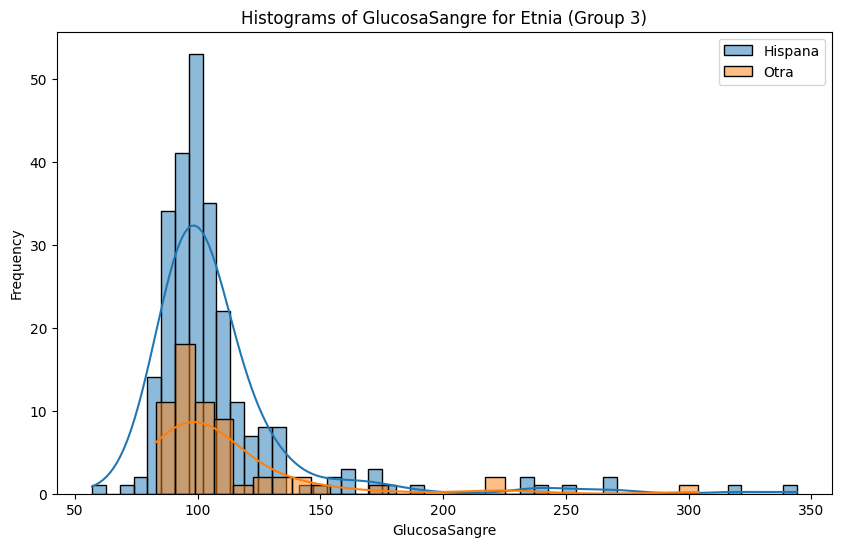

In [23]:
histogramas_agrupados(df, cat_col = "Etnia", num_col = "GlucosaSangre", group_size= 2)

**HDL:**

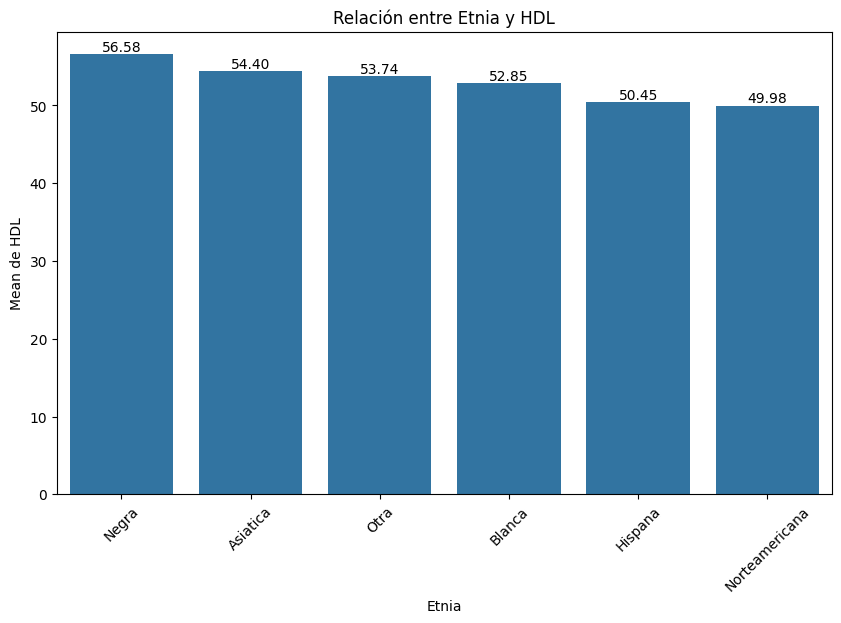

In [24]:
relacion_categorica_numerica(df, "Etnia", "HDL", show_values = True, measure = "mean")

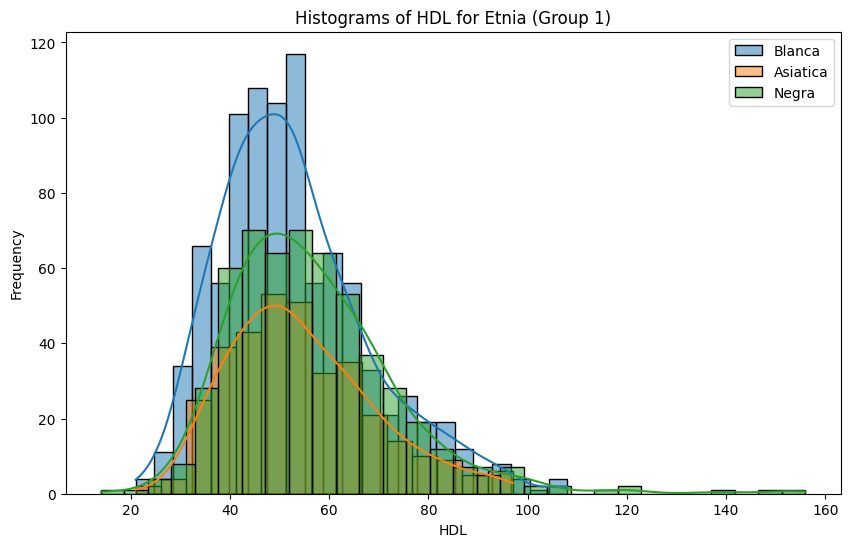

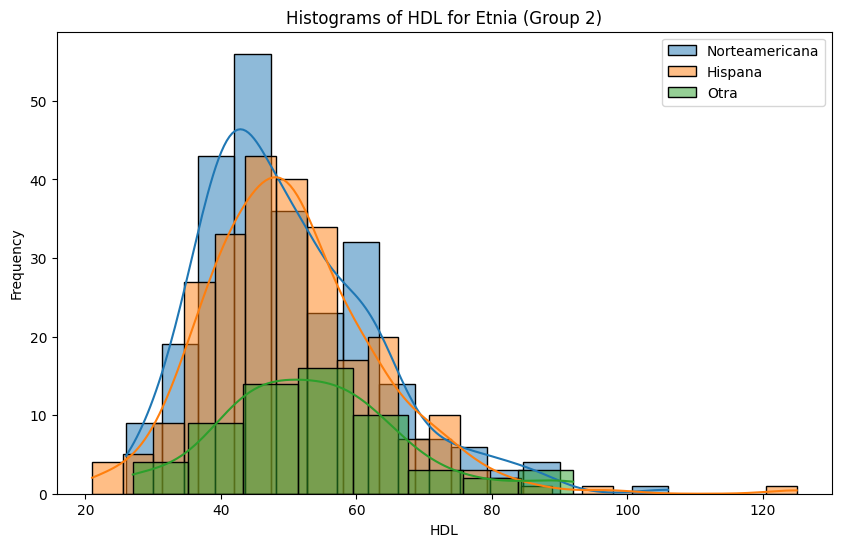

In [22]:
histogramas_agrupados(df, cat_col = "Etnia", num_col = "HDL", group_size= 3)

**Triglicéridos:**

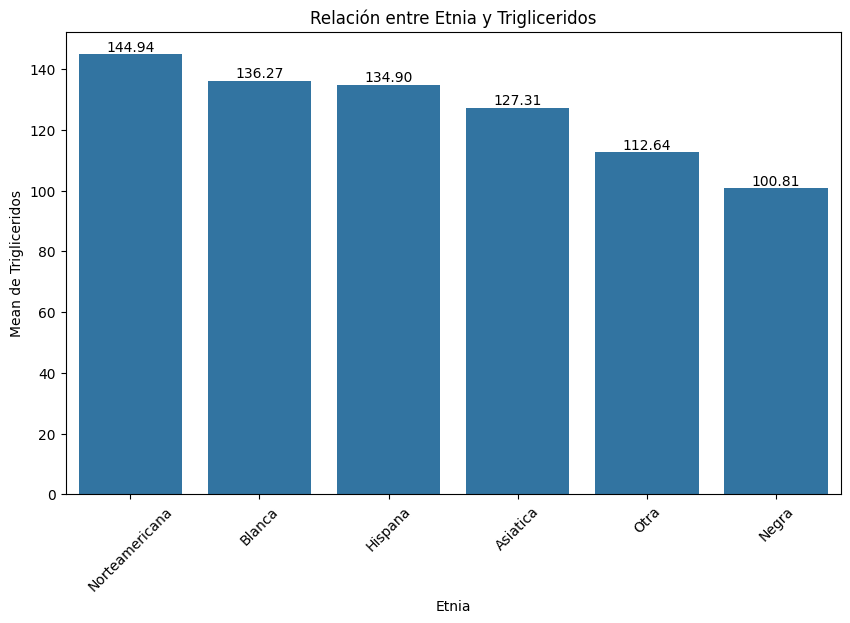

In [23]:
relacion_categorica_numerica(df, "Etnia", "Trigliceridos", show_values = True, measure = "mean")

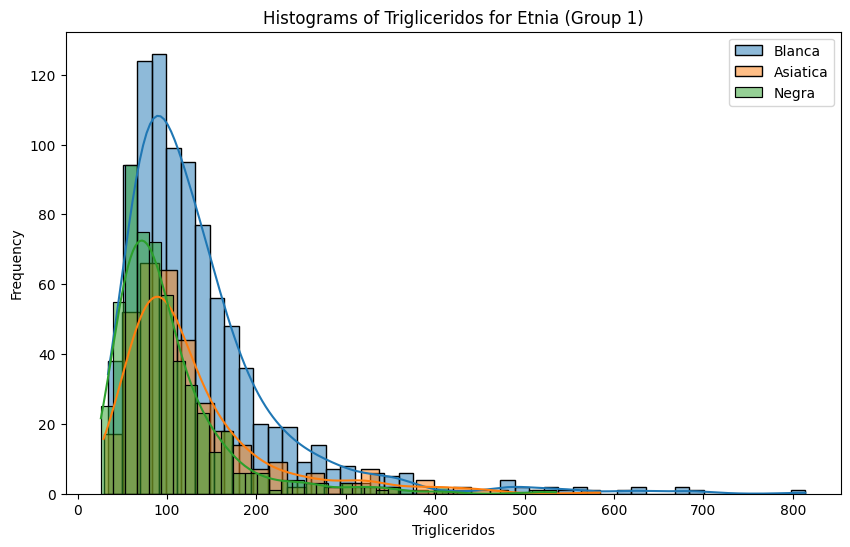

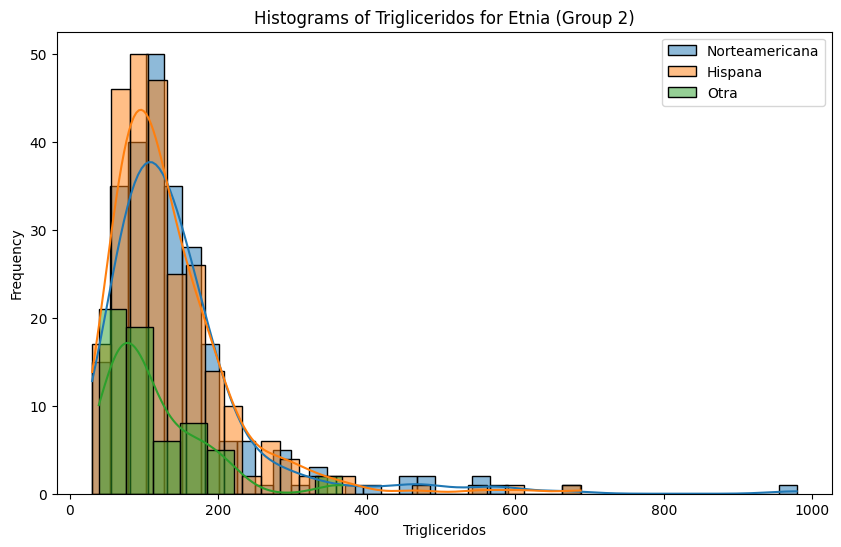

In [24]:
histogramas_agrupados(df, cat_col = "Etnia", num_col = "Trigliceridos", group_size= 3)

Tras analizar los gráficos de los diferentes indicadores sanguíneos por etnia, vemos que coinciden con los resultados anteriormente vistos:
- La media de valores de glucosa en sangre y triglicéridos más alta está en el grupo de los norteamericanos.
- La media más baja de los valores de HDL aparece también en la etnia norteamericana y en la hispana.
- Los asiáticos y negros son los que mejores valores tienen en general. Aunque nos llama la atención que la etnia negra tiene valores de glucosa en sangre parecidos a los norteamericanos, sin embargo, tienen menor porcentaje de positivos en sindrome metabólico.

### CONCLUSIONES

Las conclusiones y datos interesantes tras analizar las variables de manera cruzada son:
1. Los ingresos son influyentes en la existencia o no de un diagnóstico de síndrome metabólico: a menos ingresos, más casos.
1. El estado civil del sujeto también es una variable a tener en cuenta: sujetos separados y viudos tienen mayor porcentaje de diagnósticos, mientras que solteros tienen el menor.
1. La etnia está relacionada con la presencia de síndrome metabólico: los norteamericanos e hispanos tienen los mayores porcentajes de positivos.
1. Observamos una clara relación entre edad y síndrome metabólico: a mayor edad, mayor número de casos.
1. El IMC en la población negra es el más alto, sin embargo, no son el grupo que más diagnósticos tiene. 
1. La etnia norteamericana tiene una media de circunferencia de la cintura muy parecida a la que tienen otras etnias, pero es una de las que más sujetos con síndrome metabólico tiene.
1. Con respecto a los indicadores sanguíneos y de orina:
    - Todos los valores sanguíneos cuadran con la cantidad de diagnósticos. Los hispanos y norteamericanos tienen peores valores analíticos. Destacamos que la etnia negra tiene valores de glucosa en sangre parecidos a los norteamericanos, pero su porcentaje de positivos es menor.
    - Los indicadores de orina son muy parecidos en todas las poblaciones, aunque sí hay relación entre etnia y valores en orina.